# MRI Dataset

In [1]:
# importing the libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.models
from tensorflow.keras.models import Sequential

In [2]:
# pulling the data
DATADIR =r'./MRI Dataset/training'
img_size = 250
categories = [category for category in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, category))]

print("Categories found in the dataset directory:")
for category in categories:
    print(category)

Categories found in the dataset directory:
glioma_tumor
meningioma_tumor
no_tumor
pituitary_tumor


In [3]:
# for cat in CAT:
#   path = os.path.join(DATADIR, cat)
#   print(path)
#   for img in os.listdir(path):
#     img_array = cv2.imread(os.path.join(path, img))
#     print(img_array.shape)
#     plt.imshow(img_array)
#     plt.show()
#     break
#   break

In [4]:
from tqdm import tqdm
data = []

def creat_data():
  for cat in categories:
    path = os.path.join(DATADIR, cat)
    class_num = categories.index(cat)
    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        data.append([new_array, class_num])
      except Exception as e:
        pass

In [5]:
creat_data()
print(len(data))

  1%|          | 5/926 [00:00<00:19, 46.66it/s]

100%|██████████| 827/827 [00:16<00:00, 50.42it/s]

3086


In [6]:
X = []
Y = []

for features, label in tqdm(data):
  X.append(features)
  Y.append(label)

100%|██████████| 3086/3086 [00:00<00:00, 549273.17it/s]


In [7]:
x = np.array(X)
y = np.array(Y)

In [8]:
x.shape

(3086, 250, 250, 3)

In [9]:
y.shape

(3086,)

### Data Visualization

In [10]:
first_img = x[2].reshape((250,250,3))/255.0
first_img

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [11]:
# r = [1,2,3,4,5,6,7,8,9,10]

# for i in r:
#   plt.subplot(1, len(r), i)
#   plt.imshow(X[i].reshape(180,180,3))
#   plt.axis('off')
#   plt.title(CAT[y[i]])
#   plt.tight_layout()

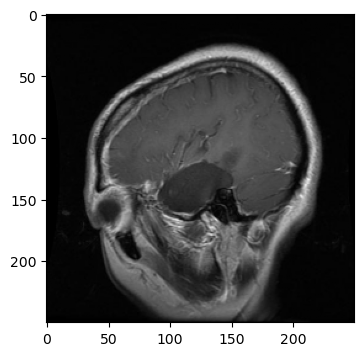

In [12]:
plt.figure(figsize=(4,4))
plt.imshow(first_img, cmap=plt.cm.gray)
plt.show()

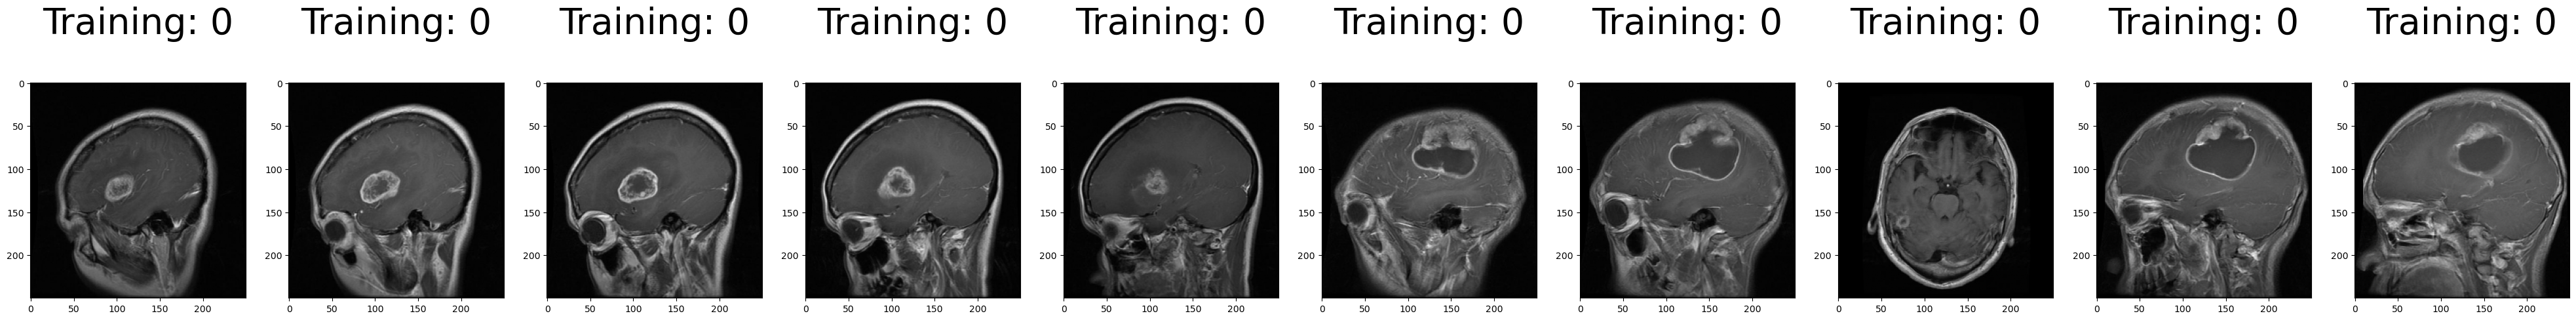

In [13]:
plt.figure(figsize=(50,10))
for index, (image, label) in enumerate(zip(x[5:15], y[5:15])):
    plt.subplot(1, 10, index+1)
    reshaped_img = image.reshape((250, 250,3))/255.0
    plt.imshow(reshaped_img, cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 40)

### Spliting Dataset into Training and Testing

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size= 0.25)

# X_train = X_train / 255.0
# X_test = X_test / 255.0

# print(f'Shape of X_train {X_train.shape}')
# print(f'Shape of Y_train {y_train.shape}')

# print(f'\n Shape of X_test {X_test.shape}')
# print(f'Shape of Y_test {y_test.shape}')

In [15]:
# import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten

# from tensorflow.keras import layers, models


### Applying CNN

In [16]:
#CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), padding = 'Same', activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size = (3,3), padding = 'Same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

#ANN

model.add(Dense(228, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(5, activation='softmax'))



# # Defining a CNN Model for Classification
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5), padding='Same', activation = 'relu',input_shape=(180,180,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='Same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters = 96, kernel_size = (3,3), padding='Same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dense(5, activation='softmax'))
# model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# #ANN
# model = Sequential([
#     Dense(128, activation='relu',input_shape=(97200,)),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(10, activation='softmax')
# ])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
import time
S=time.time()
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))
E=time.time()

Epoch 1/30
73/73 [==============================] - 289s 4s/step - loss: 4.3618 - accuracy: 0.5225 - val_loss: 0.8927 - val_accuracy: 0.6269
Epoch 2/30
73/73 [==============================] - 275s 4s/step - loss: 0.7171 - accuracy: 0.7148 - val_loss: 0.6852 - val_accuracy: 0.7448
Epoch 3/30
73/73 [==============================] - 274s 4s/step - loss: 0.4886 - accuracy: 0.8081 - val_loss: 0.5115 - val_accuracy: 0.7979
Epoch 4/30
73/73 [==============================] - 286s 4s/step - loss: 0.3112 - accuracy: 0.8803 - val_loss: 0.5048 - val_accuracy: 0.8303
Epoch 5/30
73/73 [==============================] - 290s 4s/step - loss: 0.1865 - accuracy: 0.9386 - val_loss: 0.6136 - val_accuracy: 0.8174
Epoch 6/30
73/73 [==============================] - 208s 3s/step - loss: 0.1610 - accuracy: 0.9434 - val_loss: 0.5902 - val_accuracy: 0.8433
Epoch 7/30
73/73 [==============================] - 207s 3s/step - loss: 0.1011 - accuracy: 0.9676 - val_loss: 0.4516 - val_accuracy: 0.8601
Epoch 8/30
73

In [20]:
# model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data = (X_test, y_test))
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=10,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=False,

# )

In [21]:
# history = model.fit(
#     datagen.flow(X_train, y_train, batch_size = 128),
#     epochs = 30, validation_data = (X_test, y_test),
#     steps_per_epoch = X_train.shape[0] // 128
# )

In [22]:
# Save the entire model to a HDF5 file
model.save('zain_model.h5')


C:\Users\Metapi Technologies\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
